<a href="https://colab.research.google.com/github/RodrigoTito/Machine-Learning-Hackathon/blob/main/Machine_Learning_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Risco de crédito por CapitainData

O XYZ Bank é um banco privado de médio porte que inclui uma variedade de produtos bancários, como contas de poupança, contas correntes, produtos de investimento, produtos de crédito e empréstimos imobiliários.

O Banco quer prever o próximo conjunto de produtos para um conjunto de clientes para otimizar suas campanhas de marketing e comunicação.

*O objetivo é prever o próximo conjunto de produtos (até 3 produtos) para um conjunto de clientes (dados de teste) com base em seus dados demográficos e acervos de produtos atuais.*

### Bibliotecas

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Carregar Dados

In [ ]:
print(sorted(os.listdir("/content")))

['.config', 'sample_data', 'test_VkM91FT.csv', 'train_go05W65.csv']


In [ ]:
test, train = [pd.read_csv(f"../content/{f}", ) for f in sorted(os.listdir("../content"))[-2:]]

### EDA - Análise Exploratória de Dados

* Os tamanhos dos datasets

In [ ]:
[x.shape for x in [test, train]]

[(20327, 8), (37748, 9)]

* Variáveis do dataset train

In [ ]:
pd.DataFrame({'Cols_Train':train.columns})

,Cols_Train
0,Customer_ID
1,Gender
2,Age
3,Vintage
4,Is_Active
5,City_Category
6,Customer_Category
7,Product_Holding_B1
8,Product_Holding_B2


Column name   | Descrição 
--------- | ------------
Customer_ID | ID único para o cliente 
Gender      | Gênero do Cliente
Age         | Idade do cliente (em anos)
Vintage     | Vintage para o cliente (em meses)
Is_Active   | Índice de atividade, 0: cliente menos frequente, 1: cliente mais frequente
City_Category| Categoria codificada da cidade do cliente
Customer_Category| Categoria codificada do cliente
Product_Holding_B1| Produto atual detido (codificado)
Product_Holding_B2| Retenção de Produto nos próximos seis meses (Codificado) - Coluna de Destino

* Colunas diferentes dos datasets train e test

In [ ]:
train.columns.difference(test.columns)

Index(['Product_Holding_B2'], dtype='object')

* Tipo das variáveis

In [ ]:
train.dtypes.value_counts()  

object    6
int64     3
dtype: int64

* Visualizando o dataset train

In [ ]:
train.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


* Resumo de cada variável do dataset train

In [ ]:
df_aux = pd.DataFrame({'Type': train.dtypes,
                      'Missing': train.isna().sum(),
                      'Size': train.shape[0],
                       'Unique': train.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
Customer_ID,object,0,37748,37748,0.0
Gender,object,0,37748,2,0.0
Age,int64,0,37748,36,0.0
Vintage,int64,0,37748,64,0.0
Is_Active,int64,0,37748,2,0.0
City_Category,object,0,37748,2,0.0
Customer_Category,object,0,37748,3,0.0
Product_Holding_B1,object,0,37748,617,0.0
Product_Holding_B2,object,0,37748,495,0.0


* Resumo de cada variável do dataset test

In [ ]:
df_aux = pd.DataFrame({'Type': test.dtypes,
                      'Missing': test.isna().sum(),
                      'Size': test.shape[0],
                       'Unique': test.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
Customer_ID,object,0,20327,20327,0.0
Gender,object,0,20327,2,0.0
Age,int64,0,20327,36,0.0
Vintage,int64,0,20327,63,0.0
Is_Active,int64,0,20327,2,0.0
City_Category,object,0,20327,2,0.0
Customer_Category,object,0,20327,3,0.0
Product_Holding_B1,object,0,20327,510,0.0


* Estatísticas descritivas

In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,37748.0,38.521379,10.121811,24.0,29.0,37.0,47.0,59.0
Vintage,37748.0,19.573169,10.252417,2.0,13.0,16.0,23.0,65.0
Is_Active,37748.0,0.264809,0.441237,0.0,0.0,0.0,1.0,1.0


* Visualização 

Gráficos de colunas

In [ ]:
def grafico_com_porcentagem(df,feature,hue):
    total = len(df)
    ax =  sns.countplot(x=feature,hue=hue, data=df,color = "#2b8cbe")
    ax.set_ylim(0,total*1.1) # Ajusta altura do frame
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (x, y+10), ha='center')
    return ax
def grafico_com_porcentagem_1(g):
    g.ax.set_ylim(0,100)
    for p in g.ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        g.ax.annotate('{:.2f}%'.format(p.get_height()), (x, y+2), ha='center')
    return g

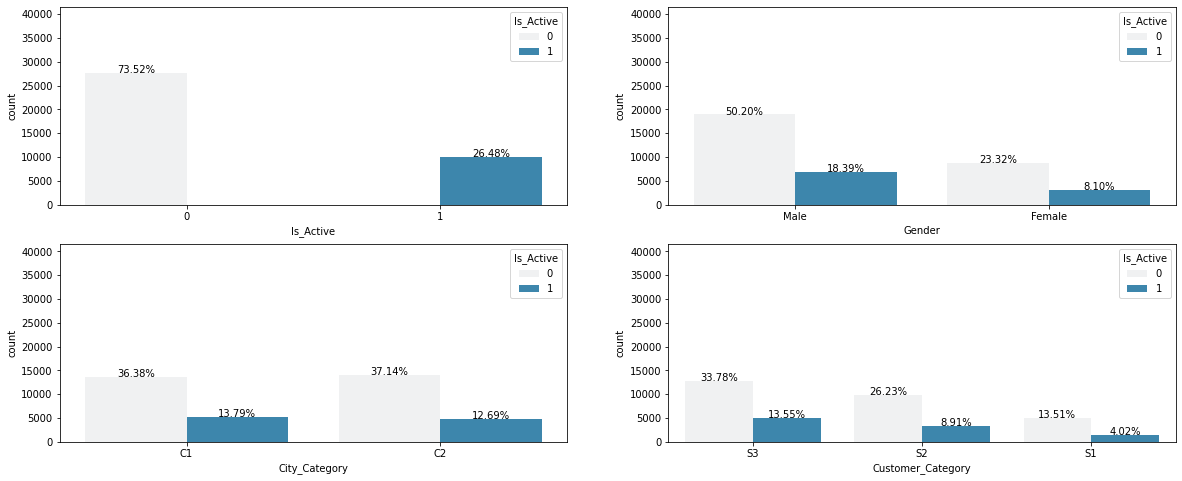

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(221),grafico_com_porcentagem(train,'Is_Active','Is_Active')
plt.subplot(222),grafico_com_porcentagem(train,'Gender','Is_Active')
plt.subplot(223),grafico_com_porcentagem(train,'City_Category','Is_Active')
plt.subplot(224),grafico_com_porcentagem(train,'Customer_Category','Is_Active')
plt.show()

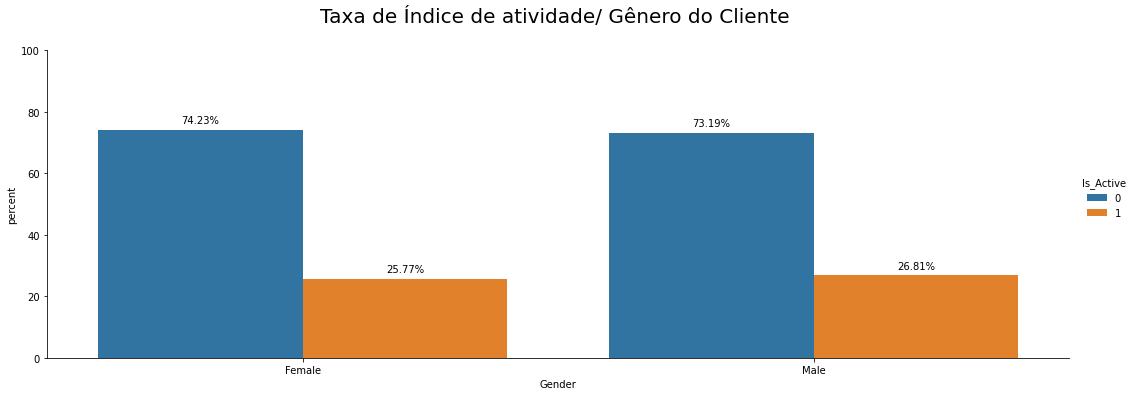

In [ ]:
df1 = train.groupby('Gender')['Is_Active'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Gender',y='percent',hue='Is_Active',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de Índice de atividade/ Gênero do Cliente \n', fontsize=20)
plt.show()

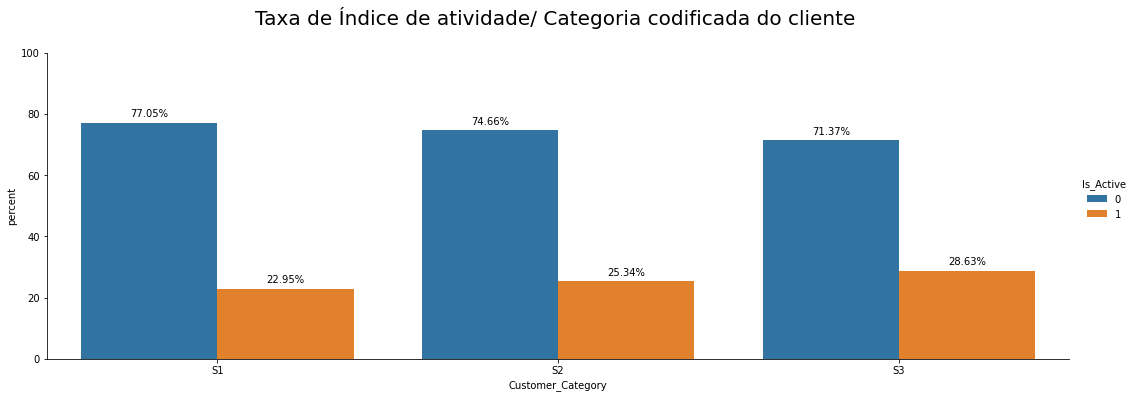

In [ ]:
df1 = train.groupby('Customer_Category')['Is_Active'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Customer_Category',y='percent',hue='Is_Active',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de Índice de atividade/ Categoria codificada do cliente \n', fontsize=20)
plt.show()

* Analisando a variável **Product_Holding_B1**	Produto atual detido (codificado)

In [ ]:
Product_Holding_B1 = pd.DataFrame({'Product_Holding_B1':train['Product_Holding_B1'].value_counts(),
              'Product_Holding_B1_%':(train['Product_Holding_B1'].value_counts(normalize=True)*100).round(2)})
Product_Holding_B1.head(15)

,Product_Holding_B1,Product_Holding_B1_%
['P13'],7443,19.72
['P16'],4424,11.72
['P17'],2342,6.20
['P11'],1581,4.19
"['P16', 'P21']",1270,3.36
"['P13', 'P21']",1106,2.93
"['P13', 'P17']",1093,2.90
"['P8', 'P13']",1067,2.83
"['P12', 'P13']",1043,2.76
"['P12', 'P16']",1036,2.74


* Lista com os códigos da coluna Produto atual detido sem duplicação:

In [ ]:
list_codigo_exclusivo_atual = []
for i in train['Product_Holding_B1']:
  list_codigo_exclusivo_atual = list(set(list_codigo_exclusivo_atual + eval(i))) # Lista cm a codificação sem duplicação: 

list_codigo_exclusivo_atual.sort()
print(list_codigo_exclusivo_atual,'\n \n','São',len(list_codigo_exclusivo_atual), 'produtos')

['P00', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P2', 'P20', 'P21', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'] 
 
 São 22 produtos


* Contabilizando os produtos atuais codificados

In [ ]:
count_prod_atual_cod = []
for p_cod in list_codigo_exclusivo_atual:
  cont = 0
  for p_hol in train['Product_Holding_B1']:
    if p_cod in eval(p_hol):
      cont = cont + 1
  count_prod_atual_cod.append(cont)

In [ ]:
dict_prod_atual_list = dict(zip(list_codigo_exclusivo_atual,count_prod_atual_cod))
query_prod_atual = pd.DataFrame(dict_prod_atual_list,index = [0],columns = list_codigo_exclusivo_atual)
query_prod_atual

,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9
0,1014,12,1472,1920,6120,16870,129,540,11270,7205,338,2122,675,3708,6435,61,33,34,105,359,2695,460


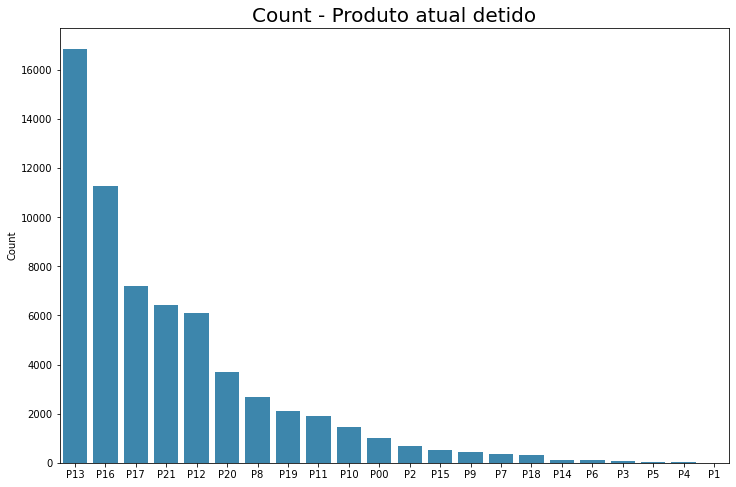

In [ ]:
#query.plot.bar()
plt.figure(figsize=(12,8))
sns.barplot(data=query_prod_atual.sort_values(by=0,axis=1,ascending=False),color = "#2b8cbe")
plt.title('Count - Produto atual detido', fontsize=20)
plt.ylabel('Count')
plt.show()

* **Product_Holding_B1:**	Produto atual detido (codificado) versus **Product_Holding_B2:** Retenção de Produto nos próximos seis meses (Codificado)


In [ ]:
P_H_B1_AND_B2 = train.groupby('Product_Holding_B1')['Product_Holding_B2'].value_counts().sort_values(ascending=False)
pd.DataFrame(P_H_B1_AND_B2).head(15)

Product_Holding_B2
Product_Holding_B1 Product_Holding_B2                    
['P13']            ['P00']                           2592
['P17']            ['P16']                           1968
['P16']            ['P8']                            1928
['P13']            ['P8']                            1859
['P11']            ['P00']                           1427
['P2']             ['P00']                            662
['P16', 'P21']     ['P12']                            618
['P16']            ['P6']                             576
                   ['P00']                            576
['P13']            ['P12']                            570
                   ['P6']                             567
['P16', 'P17']     ['P12']                            530
['P16']            ['P12']                            505
['P13']            ['P9']                             483
                   ['P3']                             476

* Analisando a variável **Product_Holding_B2**	- Retenção de Produto nos próximos seis meses (Codificado) - Coluna de Destino

In [ ]:
Product_Holding_B2 = pd.DataFrame({'Product_Holding_B2':train['Product_Holding_B2'].value_counts(),
              'Product_Holding_B2_%':(train['Product_Holding_B2'].value_counts(normalize=True)*100).round(2)})
Product_Holding_B2.head(10)

,Product_Holding_B2,Product_Holding_B2_%
['P00'],5908,15.65
['P8'],5360,14.20
['P12'],3844,10.18
['P16'],3263,8.64
['P6'],2170,5.75
['P1'],1332,3.53
"['P8', 'P12']",1244,3.30
['P13'],1117,2.96
['P10'],1069,2.83
['P3'],858,2.27


* Lista com os códigos da coluna destino sem duplicação:

In [ ]:
list_codigo_exclusivo_prox_6_meses = []
for i in train['Product_Holding_B2']:
  list_codigo_exclusivo_prox_6_meses = list(set(list_codigo_exclusivo_prox_6_meses + eval(i))) # Lista cm a codificação sem duplicação: 

list_codigo_exclusivo_prox_6_meses.sort()
print(list_codigo_exclusivo_prox_6_meses,'\n \n','São:',len(list_codigo_exclusivo_prox_6_meses),'produtos')

['P00', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P2', 'P20', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'] 
 
 São: 20 produtos


* Contabilizando os produtos codificados na variável destino

In [ ]:
count_p_cod = []
for p_cod in list_codigo_exclusivo_atual:
  cont = 0
  for p_hol in train['Product_Holding_B2']:
    if p_cod in eval(p_hol):
      cont = cont + 1
  count_p_cod.append(cont)

In [ ]:
dict_from_list = dict(zip(list_codigo_exclusivo_atual,count_p_cod))
query_prod_prox_6_meses = pd.DataFrame(dict_from_list,index = [0],columns = list_codigo_exclusivo_atual).sort_values(by=0,axis=1,ascending=False)
query_prod_prox_6_meses

,P8,P12,P00,P6,P16,P1,P4,P10,P7,P3,P9,P13,P5,P2,P11,P15,P14,P17,P20,P18,P21,P19
0,11518,7285,5908,4675,3478,3310,2943,2914,2526,2486,1833,1494,1211,206,186,41,20,17,4,2,0,0


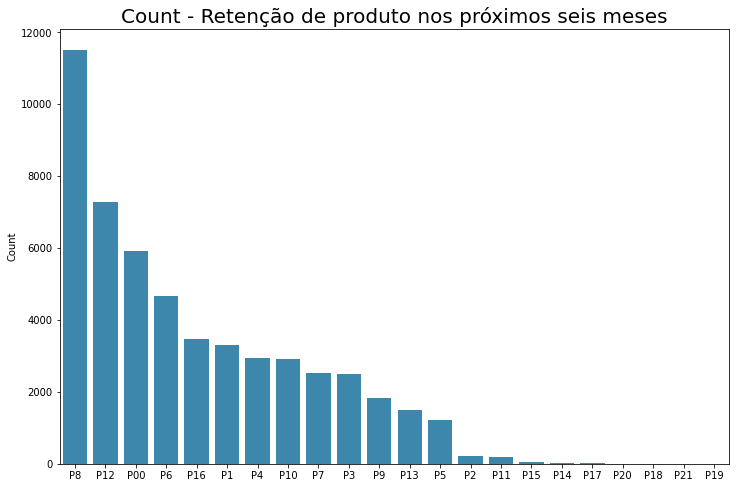

In [ ]:
#query.plot.bar()
plt.figure(figsize=(12,8))
sns.barplot(data=query_prod_prox_6_meses,color = "#2b8cbe")
plt.title('Count - Retenção de produto nos próximos seis meses', fontsize=20)
plt.ylabel('Count')
plt.show()

### Modelagem

* Fazendo uma cópia do dataset train

In [ ]:
X = train.copy()

* One-Hot na variável  **Product_Holding_B1**

In [ ]:
for p_cod in list_codigo_exclusivo_atual:
  X_cod_p = []
  for p_hol in train['Product_Holding_B1']:
    if p_cod in eval(p_hol):
      X_cod_p.append(1)
    else:
      X_cod_p.append(0)
  X[p_cod] = X_cod_p 

**Dividir dados**

* Separando a variável resposta das variáveis preditoras

In [ ]:
X = train.drop(['Product_Holding_B2'],axis=1)
y= train[["Product_Holding_B2"]]
test_Customer_ID = test['Customer_ID']

* One-Hot na variável **Product_Holding_B2**

In [ ]:
for p_cod in list_codigo_exclusivo_prox_6_meses:
  cod_p = []
  for p_hol in y['Product_Holding_B2']:
    if p_cod in eval(p_hol):
      cod_p.append(1)
    else:
      cod_p.append(0)
  y[p_cod] = cod_p 

In [ ]:
y = y.drop('Product_Holding_B2',axis=1)

* Concatenando o dataset X com o dataset test

In [ ]:
All_data = pd.concat([X, test], axis=0)

* One-Hot na variável **Product_Holding_B1**

In [ ]:
for p_cod in list_codigo_exclusivo_atual:
  cols_cod_p = []
  for p_hol in All_data['Product_Holding_B1']:
    if p_cod in eval(p_hol):
      cols_cod_p.append(1)
    else:
      cols_cod_p.append(0)
  All_data[p_cod] = cols_cod_p 

* Eliminado as variáveis **Customer_ID** e **Product_Holding_B1**

In [ ]:
All_data.drop(['Customer_ID','Product_Holding_B1'],axis=1,inplace=True)

* Listando os índices das variáveis categóricas

In [ ]:
cat_cols=All_data.select_dtypes("object").columns.tolist()
features=All_data.columns.tolist()
cat_indices = [features.index(col) for col in cat_cols]
cat_indices

[0, 4, 5]

* Criando variáveis fictícias para as variáveis categóricas

In [ ]:
all_data = pd.get_dummies(All_data, columns=cat_cols)

* Uma visão geral das estatísticas:

In [ ]:
df_stats = all_data.describe().transpose()
df_stats.head(5)

,count,mean,std,min,25%,50%,75%,max
Age,58075.0,38.460146,10.111050,24.0,29.0,37.0,47.0,59.0
Vintage,58075.0,19.585674,10.252426,2.0,13.0,16.0,23.0,80.0
Is_Active,58075.0,0.264572,0.441109,0.0,0.0,0.0,1.0,1.0
P00,58075.0,0.026001,0.159139,0.0,0.0,0.0,0.0,1.0
P1,58075.0,0.000258,0.016069,0.0,0.0,0.0,0.0,1.0


* Normalizando os dados

In [ ]:
def norm(x):
  return (x - df_stats['mean']) / df_stats['std']

all_data = norm(all_data)

In [ ]:
X = all_data[:len(X)]
test = all_data[len(X):]

In [ ]:
X.shape, test.shape

((37748, 32), (20327, 32))

* Dividindo o dataset de treinamento e validação

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def train_test_split_yi(X,y):
  Xtrain, Xval, ytrain, yval = train_test_split(X, y, random_state=0, train_size=0.75, stratify=y)
  return Xtrain, Xval, ytrain, yval

In [ ]:
print('X_train',train_test_split_yi(all_data[:len(X)],y['P00'])[0].shape,
      'X_val',train_test_split_yi(all_data[:len(X)],y['P00'])[1].shape, 
      'y_train',train_test_split_yi(all_data[:len(X)],y['P00'])[2].shape,
      'y_val',train_test_split_yi(all_data[:len(X)],y['P00'])[3].shape)

X_train (28311, 32) X_val (9437, 32) y_train (28311,) y_val (9437,)


### Modelos de classificação 

In [ ]:
!pip install catboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

import datetime
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, make_scorer

* Treinando os medelos

In [ ]:
# Definindo os modelos:
modelos = ['LogisticRegression','CatBoostClassifier','ExtraTreesClassifier','RandomForestClassifier']

def loss_func(y_true, y_predicted):
    return mean_squared_error(y_true, y_predicted, squared=False)

def modelos(X_train,X_test,y_train,y_test):
  execution_results = []
  score_model = [] # Acurácia
  MSE = [] # Erro quadrático médio
  measured_time_train = []
  models = [
    [LogisticRegression()],
    [CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)],
    [ExtraTreesClassifier(n_estimators=100)],
    [RandomForestClassifier(n_estimators=800)]
    ]
  best_score = 9999999999999
  best_clf = None
  score = make_scorer(loss_func, greater_is_better=False)
  for classifier in models:
    print("Training {}...".format(type(classifier[0]).__name__))
    begin_time = datetime.datetime.now()
    clf=classifier[0].fit(X_train, y_train) 
    msd_time_train = datetime.datetime.now() - begin_time
    measured_time_train.append(format(msd_time_train))
  # Prever com o conjunto de teste
    begin_time = datetime.datetime.now()
    y_pred = clf.predict(X_test)
  # Calculando o tempo decorrido 
    measured_time_test = datetime.datetime.now() - begin_time
  # Calculando erro quadrático médio 
    error = mean_squared_error(y_test, y_pred, squared=False)
    MSE.append(error)
  # Calculando a acurácia
    score = accuracy_score(y_test, y_pred)
    score_model.append(score)
    if error < best_score:
      best_score = error
      best_clf = clf
  return MSE,score_model,measured_time_train

* Resultados dos modelos

In [ ]:
RESULTS = []
for p_cod in list_codigo_exclusivo_prox_6_meses:
  Xtrain, Xval, ytrain, yval = train_test_split_yi(X,y[p_cod])
  MSE, score_model, measured_time_train = modelos(Xtrain,Xval,ytrain,yval)
  md = pd.DataFrame({'modelos': modelos,
                   'mse': MSE,
                   'score':score_model,
                   'tempo decorrido de treinamento':measured_time_train}).sort_values(['mse', 'score'])
  RESULTS.append(md)

In [ ]:
RESULTS[0]

,modelos,mse,score,tempo decorrido de treinamento
0,<function modelos at 0x7f2844ddcf80>,0.315103,0.900710,0:00:00.465223
1,<function modelos at 0x7f2844ddcf80>,0.330691,0.890643,0:00:00.121425
3,<function modelos at 0x7f2844ddcf80>,0.348326,0.878669,0:00:17.491939
2,<function modelos at 0x7f2844ddcf80>,0.350146,0.877397,0:00:02.377608


* Regressão Logística

In [ ]:
regressao_logistica = []
score = []
for p_cod in list_codigo_exclusivo_prox_6_meses:
  Xtrain, Xval, ytrain, yval = train_test_split_yi(X,y[p_cod])
  reg_log  = LogisticRegression().fit(Xtrain, ytrain)
  regressao_logistica.append(reg_log)
  score.append(reg_log.score(Xval,yval))

In [ ]:
df_score = pd.DataFrame(data = score,index = list_codigo_exclusivo_prox_6_meses,columns=['score']).transpose()
df_score

,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P2,P20,P3,P4,P5,P6,P7,P8,P9
score,0.90071,0.920314,0.925188,0.995973,0.907492,0.975416,0.99947,0.99894,0.970224,0.999576,1.0,0.995232,0.999894,0.934513,0.926354,0.968316,0.899862,0.938646,0.75914,0.951468


In [ ]:
print('Score médio:',df_score.transpose().mean())

Score médio: score    0.948336
dtype: float64


### Previsão e apresentação

* Inserindo a previsão do modelo do conjunto de dados test para submissão

In [ ]:
y_pred_test = pd.DataFrame(regressao_logistica[0].predict(test),columns=['P00'])
for i,p_cod in enumerate(y.columns[1:]):
  y_pred_test[p_cod] = regressao_logistica[i+1].predict(test)

In [ ]:
y_pred_test.head()

,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P2,P20,P3,P4,P5,P6,P7,P8,P9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* Convertendo os valores 0 e 1 para os valores entregáveis 

In [ ]:
for p_cod in y_pred_test.columns:
  y_pred_test[[p_cod]] = y_pred_test[[p_cod]].replace({1:str(p_cod),0:''})

y_pred_test['y_pred'] = y_pred_test.apply(lambda x: str(' '.join(x).split()), axis=1)
y_pred_test['y_pred']

0                    ['P8']
1                        []
2                   ['P16']
3                   ['P12']
4                   ['P00']
                ...        
20322                    []
20323                    []
20324                    []
20325    ['P1', 'P6', 'P7']
20326                ['P8']
Name: y_pred, Length: 20327, dtype: object

* Importando o arquivo de verificação de soluções

In [ ]:
submission = pd.read_csv('/content/sample_submission_kF044ur.csv')

In [ ]:
submission['Customer_ID'] = test_Customer_ID
submission['Product_Holding_B2'] = y_pred_test['y_pred'] 
submission.head()

,Customer_ID,Product_Holding_B2
0,CC372708,['P8']
1,CC216072,[]
2,CC387629,['P16']
3,CC389228,['P12']
4,CC394445,['P00']


* Salvando no formato .csv para envio

In [ ]:
submission.to_csv("submission.csv", index = False)

In [ ]:
pd.read_csv('submission.csv').head(10)

,Customer_ID,Product_Holding_B2
0,CC372708,['P8']
1,CC216072,[]
2,CC387629,['P16']
3,CC389228,['P12']
4,CC394445,['P00']
5,CC241088,[]
6,CC381551,['P16']
7,CC238627,"['P12', 'P8']"
8,CC287515,[]
9,CC312519,"['P4', 'P8']"
